In [1]:
import pandas as pd
import numpy as np

# Leitura das informações do arquivo "crx.names"
with open('crx.names', 'r') as names_file:
    lines = names_file.read().split('\n')[31:47]

# Extração das informações para os nomes das colunas
column_names = []
for line in lines:
    parts = line.split(':')
    column_names.append(f'{parts[0].strip()}')

# Leitura dos dados do arquivo "crx.data"
data_df = pd.read_csv('crx.data', header=None)

# Verifique se o número de colunas no arquivo de dados corresponde ao número de nomes de colunas
if len(data_df.columns) == len(column_names):
    data_df.columns = column_names
else:
    print("Número de colunas não corresponde ao número de nomes de colunas.")

data_df

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,-


In [2]:
#Ver as informacoes dos dados
#data_df.info()

In [3]:
#Verificar se existem valores nulos
#data_df.isnull().sum()

In [4]:
#Verificar os valores que estao na coluna A1
data_df['A1'].unique() #Os valores nulos estao representados em '?'

array(['b', 'a', '?'], dtype=object)

In [5]:
#Verificar os numero nulos existentes em cada coluna
inter = (data_df['A14'] == '?').sum()
inter

13

In [6]:
#Transformar a '?' em valor nulo
data_df = data_df.replace('?', np.nan)
data_df.isnull().sum()

A1     12
A2     12
A3      0
A4      6
A5      6
A6      9
A7      9
A8      0
A9      0
A10     0
A11     0
A12     0
A13     0
A14    13
A15     0
A16     0
dtype: int64

In [7]:
#Verifica se ha linhas duplicadas
duplicated = data_df.duplicated()
values = duplicated.any()

if values:
    print("Ha valores duplicados")
else:
    print("Nao ha valores duplicados")

Nao ha valores duplicados


In [8]:
#Dpulicar 15% dos valores do dataframe

# Calcule o número de duplicatas com base na porcentagem
num_duplicados = int(len(data_df) * 0.15)

# Selecione aleatoriamente um conjunto de linhas para duplicação
indices_duplicados = np.random.choice(len(data_df), num_duplicados, replace=False)

# Duplique as linhas selecionadas
duplicados = data_df.iloc[indices_duplicados]

# Adicione as duplicatas ao DataFrame original
data_df = pd.concat([data_df, duplicados], ignore_index=True)

data_df

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
788,b,40.58,1.500,u,g,i,bb,0.00,f,f,0,f,s,00300,0,-
789,b,34.42,4.250,u,g,i,bb,3.25,t,t,2,f,g,00274,610,+
790,a,46.00,4.000,u,g,j,j,0.00,t,f,0,f,g,00100,960,+
791,a,35.17,3.750,u,g,ff,ff,0.00,f,t,6,f,g,00000,200,-


In [9]:
#Verifica novamente se ha linhas duplicadas
duplicated = data_df.duplicated()
values = duplicated.any()

if values:
    print("Ha valores duplicados")
else:
    print("Nao ha valores duplicados")

Ha valores duplicados


In [10]:
#Alterando os valores do ficheiro, para os valores reais
data_df['A1'] = data_df['A1'].map({'a':'masculino', 'b':'feminino'})
data_df['A9'] = data_df['A9'].map({'t':'true', 'f':'false'})
data_df['A10'] = data_df['A10'].map({'t':'true', 'f':'false'})
data_df['A12'] = data_df['A12'].map({'t':'true', 'f':'false'})
data_df['A16'] = data_df['A16'].map({'+':1, '-':0})
data_df.head(10)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,feminino,30.83,0.000,u,g,w,v,1.250,true,true,1,false,g,00202,0,1
1,masculino,58.67,4.460,u,g,q,h,3.040,true,true,6,false,g,00043,560,1
2,masculino,24.50,0.500,u,g,q,h,1.500,true,false,0,false,g,00280,824,1
3,feminino,27.83,1.540,u,g,w,v,3.750,true,true,5,true,g,00100,3,1
4,feminino,20.17,5.625,u,g,w,v,1.710,true,false,0,false,s,00120,0,1
5,feminino,32.08,4.000,u,g,m,v,2.500,true,false,0,true,g,00360,0,1
6,feminino,33.17,1.040,u,g,r,h,6.500,true,false,0,true,g,00164,31285,1
7,masculino,22.92,11.585,u,g,cc,v,0.040,true,false,0,false,g,00080,1349,1
8,feminino,54.42,0.500,y,p,k,h,3.960,true,false,0,false,g,00180,314,1
9,feminino,42.50,4.915,y,p,w,v,3.165,true,false,0,true,g,00052,1442,1


In [11]:
#Alterando o nome dos atributos(Colunas)
column_names = {
    'A1': 'sexo',
    'A2': 'renda',
    'A3': 'renda_conjunta',
    'A4': 'tempo',
    'A5': 'regiao',
    'A7': 'item',
    'A8': 'prestacao_mensal',
    'A9': 'empregado',
    'A10': 'estado_civil',
    'A12': 'graduado',
    'A15': 'emprestimo',
    'A16': 'aprovacao'
}

# Renomear colunas
data_df = data_df.rename(columns=column_names)

data_df

,sexo,renda,renda_conjunta,tempo,regiao,A6,item,prestacao_mensal,empregado,estado_civil,A11,graduado,A13,A14,emprestimo,aprovacao
0,feminino,30.83,0.000,u,g,w,v,1.25,true,true,1,false,g,00202,0,1
1,masculino,58.67,4.460,u,g,q,h,3.04,true,true,6,false,g,00043,560,1
2,masculino,24.50,0.500,u,g,q,h,1.50,true,false,0,false,g,00280,824,1
3,feminino,27.83,1.540,u,g,w,v,3.75,true,true,5,true,g,00100,3,1
4,feminino,20.17,5.625,u,g,w,v,1.71,true,false,0,false,s,00120,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
788,feminino,40.58,1.500,u,g,i,bb,0.00,false,false,0,false,s,00300,0,0
789,feminino,34.42,4.250,u,g,i,bb,3.25,true,true,2,false,g,00274,610,1
790,masculino,46.00,4.000,u,g,j,j,0.00,true,false,0,false,g,00100,960,1
791,masculino,35.17,3.750,u,g,ff,ff,0.00,false,true,6,false,g,00000,200,0


In [12]:
# Salvar o DataFrame em um arquivo CSV
data_df.to_csv('credit.csv', index=False)

#Lendo o ficheiro credit.csv
df = pd.read_csv('credit.csv')
df

,sexo,renda,renda_conjunta,tempo,regiao,A6,item,prestacao_mensal,empregado,estado_civil,A11,graduado,A13,A14,emprestimo,aprovacao
0,feminino,30.83,0.000,u,g,w,v,1.25,True,True,1,False,g,202.0,0,1
1,masculino,58.67,4.460,u,g,q,h,3.04,True,True,6,False,g,43.0,560,1
2,masculino,24.50,0.500,u,g,q,h,1.50,True,False,0,False,g,280.0,824,1
3,feminino,27.83,1.540,u,g,w,v,3.75,True,True,5,True,g,100.0,3,1
4,feminino,20.17,5.625,u,g,w,v,1.71,True,False,0,False,s,120.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
788,feminino,40.58,1.500,u,g,i,bb,0.00,False,False,0,False,s,300.0,0,0
789,feminino,34.42,4.250,u,g,i,bb,3.25,True,True,2,False,g,274.0,610,1
790,masculino,46.00,4.000,u,g,j,j,0.00,True,False,0,False,g,100.0,960,1
791,masculino,35.17,3.750,u,g,ff,ff,0.00,False,True,6,False,g,0.0,200,0


In [13]:
#Verifica novamente se ha linhas duplicadas
duplicated = df.duplicated()
values = duplicated.any()

if values:
    print("Ha valores duplicados")
else:
    print("Nao ha valores duplicados")

Ha valores duplicados


In [14]:
#Eliminado valores duplicados
df = df.drop_duplicates()
df

,sexo,renda,renda_conjunta,tempo,regiao,A6,item,prestacao_mensal,empregado,estado_civil,A11,graduado,A13,A14,emprestimo,aprovacao
0,feminino,30.83,0.000,u,g,w,v,1.25,True,True,1,False,g,202.0,0,1
1,masculino,58.67,4.460,u,g,q,h,3.04,True,True,6,False,g,43.0,560,1
2,masculino,24.50,0.500,u,g,q,h,1.50,True,False,0,False,g,280.0,824,1
3,feminino,27.83,1.540,u,g,w,v,3.75,True,True,5,True,g,100.0,3,1
4,feminino,20.17,5.625,u,g,w,v,1.71,True,False,0,False,s,120.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,feminino,21.08,10.085,y,p,e,h,1.25,False,False,0,False,g,260.0,0,0
686,masculino,22.67,0.750,u,g,c,v,2.00,False,True,2,True,g,200.0,394,0
687,masculino,25.25,13.500,y,p,ff,ff,2.00,False,True,1,True,g,200.0,1,0
688,feminino,17.92,0.205,u,g,aa,v,0.04,False,False,0,False,g,280.0,750,0


In [15]:
#Verificando valores nulos
df.isnull().sum()

sexo                12
renda               12
renda_conjunta       0
tempo                6
regiao               6
A6                   9
item                 9
prestacao_mensal     0
empregado            0
estado_civil         0
A11                  0
graduado             0
A13                  0
A14                 13
emprestimo           0
aprovacao            0
dtype: int64

In [16]:
#Preenchendo os valores nulos fazendo a imputação
df.loc[:,'sexo'] = df['sexo'].fillna(df['sexo'].mode().iloc[0]) #Preenche os valores nulos de acordo a moda
df.loc[:,'renda'] = df['renda'].fillna(df['renda'].mean()) #Preenche os valores de acordo a media
df.loc[:,'tempo'] = df['tempo'].fillna(df['tempo'].mode().iloc[0])
df.loc[:,'regiao'] = df['regiao'].fillna(df['regiao'].mode().iloc[0])
df.loc[:,'A6'] = df['A6'].fillna(df['A6'].mode().iloc[0])
df.loc[:,'item'] = df['item'].fillna(df['item'].mode().iloc[0])
df.loc[:,'A14'] = df['A14'].fillna(df['A14'].mean()).round()
df.isnull().sum()

sexo                0
renda               0
renda_conjunta      0
tempo               0
regiao              0
A6                  0
item                0
prestacao_mensal    0
empregado           0
estado_civil        0
A11                 0
graduado            0
A13                 0
A14                 0
emprestimo          0
aprovacao           0
dtype: int64

In [17]:
#Transformar os dados categoricos em dados numericos
from sklearn.preprocessing import LabelEncoder

l1 = LabelEncoder()
l1.fit(df['sexo'])
df.sexo = l1.transform(df.sexo)
df

C:\Users\arist\AppData\Local\Temp\ipykernel_24312\2503251220.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sexo = l1.transform(df.sexo)


,sexo,renda,renda_conjunta,tempo,regiao,A6,item,prestacao_mensal,empregado,estado_civil,A11,graduado,A13,A14,emprestimo,aprovacao
0,0,30.83,0.000,u,g,w,v,1.25,True,True,1,False,g,202.0,0,1
1,1,58.67,4.460,u,g,q,h,3.04,True,True,6,False,g,43.0,560,1
2,1,24.50,0.500,u,g,q,h,1.50,True,False,0,False,g,280.0,824,1
3,0,27.83,1.540,u,g,w,v,3.75,True,True,5,True,g,100.0,3,1
4,0,20.17,5.625,u,g,w,v,1.71,True,False,0,False,s,120.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,0,21.08,10.085,y,p,e,h,1.25,False,False,0,False,g,260.0,0,0
686,1,22.67,0.750,u,g,c,v,2.00,False,True,2,True,g,200.0,394,0
687,1,25.25,13.500,y,p,ff,ff,2.00,False,True,1,True,g,200.0,1,0
688,0,17.92,0.205,u,g,aa,v,0.04,False,False,0,False,g,280.0,750,0


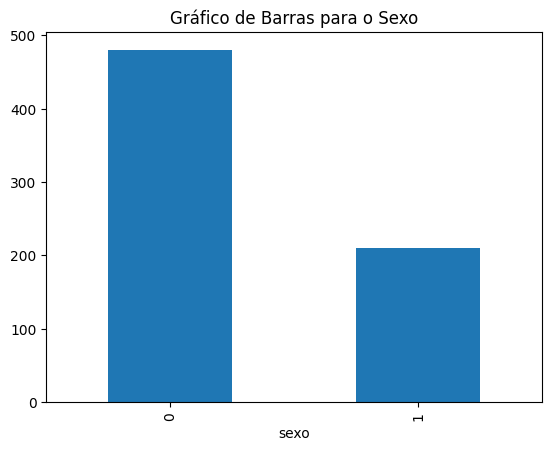

In [133]:
import seaborn as sb
import matplotlib.pyplot as plt

#Grafico de barras da coluna Sexo
df['sexo'].value_counts().plot(kind='bar')
plt.title('Gráfico de Barras para o Sexo')
plt.show()

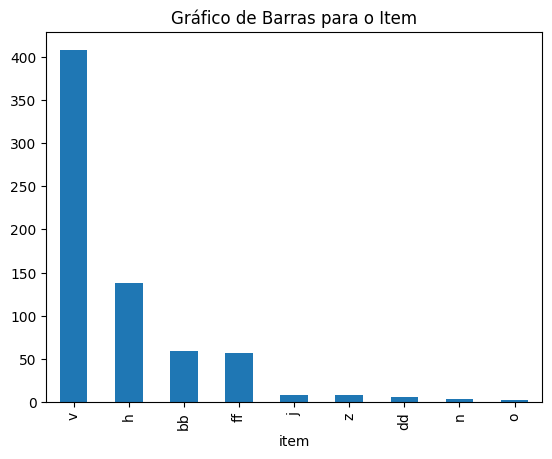

In [134]:
#Grafico de barras da coluna A7
df['item'].value_counts().plot(kind='bar')
plt.title('Gráfico de Barras para o Item')
plt.show()

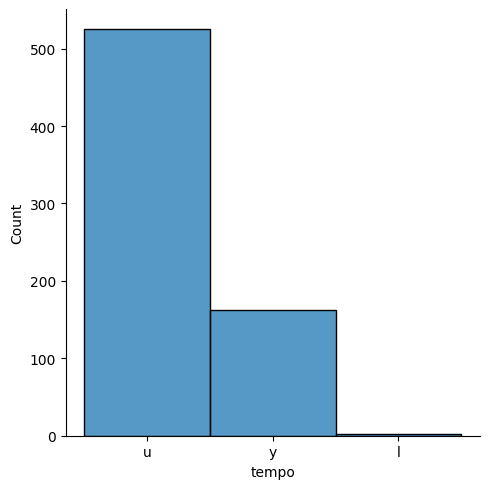

In [135]:
#Histograma da coluna A4
sb.displot(df['tempo'])
plt.show()

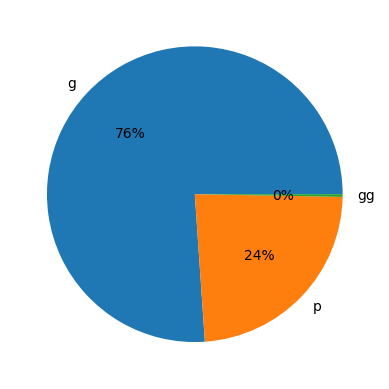

In [136]:
#Grafico de sectores da coluna A5
g = (df['regiao'] == 'g').sum()
p = (df['regiao'] == 'p').sum()
gg = (df['regiao'] == 'gg').sum()

a7 = [g, p, gg]
period = ['g', 'p', 'gg']

plt.pie(a7, labels=period, autopct='%0.0f%%')
plt.show()

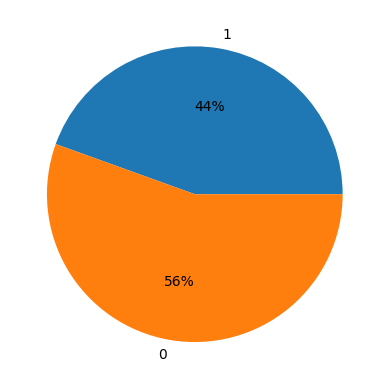

In [137]:
#Grafico de sectores da coluna A16
um = (df['aprovacao'] == 1).sum()
zero = (df['aprovacao'] == 0).sum()

a16 = [um, zero]
period = [1, 0]

plt.pie(a16, labels=period, autopct='%0.0f%%')
plt.show()

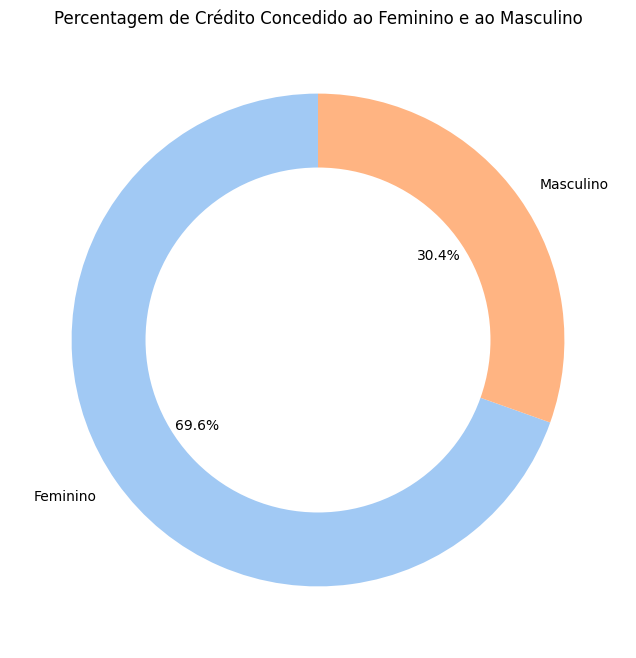

In [138]:
# Mapeamento de rótulos para gráficos
rotulos_sexo = {0: 'Feminino', 1: 'Masculino'}

# Criar uma figura com subplots
fig, ax = plt.subplots(figsize=(8, 8))

# Contar a ocorrência de cada valor na coluna 'sexo'
contagem_sexo = df['sexo'].map(rotulos_sexo).value_counts()

# Criar um gráfico de setores
ax.pie(contagem_sexo, labels=contagem_sexo.index, autopct='%1.1f%%', startangle=90, colors=sb.color_palette('pastel'))

# Adicionar um círculo no meio para transformar em um gráfico de setores
centro_circulo = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centro_circulo)

# Adicionar título
plt.title('Percentagem de Crédito Concedido ao Feminino e ao Masculino')
plt.show()

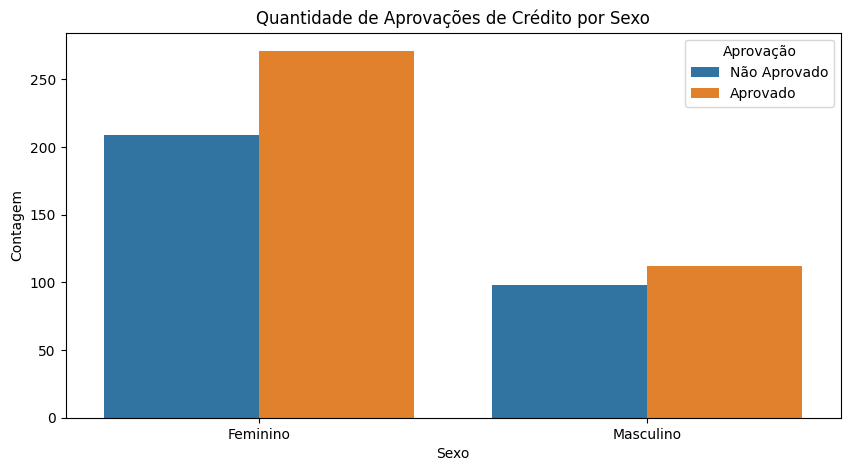

In [139]:
rotulos_aprovacao = {0: 'Não Aprovado', 1: 'Aprovado'}

#Gráfico de barras para a quantidade de aprovações de crédito por sexo
plt.figure(figsize=(10, 5))
sb.countplot(x='sexo', hue='aprovacao', data=df.replace({'sexo': rotulos_sexo, 'aprovacao': rotulos_aprovacao}))
plt.title('Quantidade de Aprovações de Crédito por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Contagem')
plt.legend(title='Aprovação', labels=['Não Aprovado', 'Aprovado'])
plt.xticks(ticks=[0, 1], labels=['Feminino', 'Masculino'])
plt.show()

In [18]:
# Salvar o DataFrame no arquivo credit.csv
df.to_csv('credit.csv', index=False)
df

,sexo,renda,renda_conjunta,tempo,regiao,A6,item,prestacao_mensal,empregado,estado_civil,A11,graduado,A13,A14,emprestimo,aprovacao
0,0,30.83,0.000,u,g,w,v,1.25,True,True,1,False,g,202.0,0,1
1,1,58.67,4.460,u,g,q,h,3.04,True,True,6,False,g,43.0,560,1
2,1,24.50,0.500,u,g,q,h,1.50,True,False,0,False,g,280.0,824,1
3,0,27.83,1.540,u,g,w,v,3.75,True,True,5,True,g,100.0,3,1
4,0,20.17,5.625,u,g,w,v,1.71,True,False,0,False,s,120.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,0,21.08,10.085,y,p,e,h,1.25,False,False,0,False,g,260.0,0,0
686,1,22.67,0.750,u,g,c,v,2.00,False,True,2,True,g,200.0,394,0
687,1,25.25,13.500,y,p,ff,ff,2.00,False,True,1,True,g,200.0,1,0
688,0,17.92,0.205,u,g,aa,v,0.04,False,False,0,False,g,280.0,750,0
